IMPORTING ALL NECESSARY PACKAGES. MOST OF THEM ARE ALREADY IN THE ANACONDA DISTRIBUTION

In [206]:
import requests
from bs4 import BeautifulSoup as soup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

WE START WITH DATA SCRAPING SHOT DATA FROM UNDERSTAT. ERLING HAALAND'S PLAYER ID IS 8260 SO WE ADD THAT IN THE BASE URL. THE SITE IS https://understat.com/player/8260

In [207]:
url ='https://understat.com/player/8260'

In [208]:
html = requests.get(url)

In [209]:
html.content

b'<!DOCTYPE html>\n<html>\n    <head>\n\t\t<base href="https://understat.com/">\n\t\t<title>Erling Haaland | Borussia Dortmund | xG | Shot Map | Goal stats | Understat.com</title>\n        <meta charset="UTF-8" />\n\t\t<meta name="description" content="Erling Haaland football stats. xG, shot map, match history. Minutes, goals and assits by club, position, situation.">\n\t\t<meta name="Keywords" content="Erling Haaland, xG, expected goals, shot map, goals, assists, advanced statistics, match history, football stats"> \n\t\t\t<link rel="apple-touch-icon" sizes="180x180" href="apple-touch-icon.png">\n\t<link rel="icon" type="image/png" sizes="32x32" href="favicon-32x32.png">\n\t<link rel="icon" type="image/png" sizes="16x16" href="favicon-16x16.png">\n\t<link rel="manifest" href="manifest.json">\n\t<link rel="mask-icon" href="safari-pinned-tab.svg" color="#5bbad5">\n\t<meta name="apple-mobile-web-app-title" content="understat">\n\t<meta name="application-name" content="understat">\n\t<met

In [210]:
parse_soup = soup(html.content,'lxml')

In [211]:
scripts = parse_soup.find_all('script')
len(scripts)

25

A QUICK GLANCE AND WE FIND THE NECESSARY DATA(SHOTSDATA) IS INDEX 3. SO WE EXTRACT FROM THAT DICTIONARY.

In [212]:
scripts[3].string

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x22354876\\x22,\\x22minute\\x22\\x3A\\x2258\\x22,\\x22result\\x22\\x3A\\x22Goal\\x22,\\x22X\\x22\\x3A\\x220.8880000305175781\\x22,\\x22Y\\x22\\x3A\\x220.6659999847412109\\x22,\\x22xG\\x22\\x3A\\x220.07933320105075836\\x22,\\x22player\\x22\\x3A\\x22Erling\\x20Haaland\\x22,\\x22h_a\\x22\\x3A\\x22a\\x22,\\x22player_id\\x22\\x3A\\x228260\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222019\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x2212562\\x22,\\x22h_team\\x22\\x3A\\x22Augsburg\\x22,\\x22a_team\\x22\\x3A\\x22Borussia\\x20Dortmund\\x22,\\x22h_goals\\x22\\x3A\\x223\\x22,\\x22a_goals\\x22\\x3A\\x225\\x22,\\x22date\\x22\\x3A\\x222020\\x2D01\\x2D18\\x2014\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Jadon\\x20Sancho\\x22,\\x22lastAction\\x22\\x3A\\x22Throughball\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22354881\\x22,\\x22minute\\x22\\x3A\\x2269\\x22,\\x22result\\x22\\x3A\\

In [213]:
strings = scripts[3].string

In [214]:
ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

json_data

'[{"id":"354876","minute":"58","result":"Goal","X":"0.8880000305175781","Y":"0.6659999847412109","xG":"0.07933320105075836","player":"Erling Haaland","h_a":"a","player_id":"8260","situation":"OpenPlay","season":"2019","shotType":"LeftFoot","match_id":"12562","h_team":"Augsburg","a_team":"Borussia Dortmund","h_goals":"3","a_goals":"5","date":"2020-01-18 14:30:00","player_assisted":"Jadon Sancho","lastAction":"Throughball"},{"id":"354881","minute":"69","result":"Goal","X":"0.98","Y":"0.48900001525878906","xG":"0.9206209778785706","player":"Erling Haaland","h_a":"a","player_id":"8260","situation":"OpenPlay","season":"2019","shotType":"LeftFoot","match_id":"12562","h_team":"Augsburg","a_team":"Borussia Dortmund","h_goals":"3","a_goals":"5","date":"2020-01-18 14:30:00","player_assisted":"Thorgan Hazard","lastAction":"Pass"},{"id":"354883","minute":"78","result":"Goal","X":"0.8830000305175781","Y":"0.34700000762939454","xG":"0.3228312134742737","player":"Erling Haaland","h_a":"a","player_id"

In [215]:
data = json.loads(json_data)
data

[{'id': '354876',
  'minute': '58',
  'result': 'Goal',
  'X': '0.8880000305175781',
  'Y': '0.6659999847412109',
  'xG': '0.07933320105075836',
  'player': 'Erling Haaland',
  'h_a': 'a',
  'player_id': '8260',
  'situation': 'OpenPlay',
  'season': '2019',
  'shotType': 'LeftFoot',
  'match_id': '12562',
  'h_team': 'Augsburg',
  'a_team': 'Borussia Dortmund',
  'h_goals': '3',
  'a_goals': '5',
  'date': '2020-01-18 14:30:00',
  'player_assisted': 'Jadon Sancho',
  'lastAction': 'Throughball'},
 {'id': '354881',
  'minute': '69',
  'result': 'Goal',
  'X': '0.98',
  'Y': '0.48900001525878906',
  'xG': '0.9206209778785706',
  'player': 'Erling Haaland',
  'h_a': 'a',
  'player_id': '8260',
  'situation': 'OpenPlay',
  'season': '2019',
  'shotType': 'LeftFoot',
  'match_id': '12562',
  'h_team': 'Augsburg',
  'a_team': 'Borussia Dortmund',
  'h_goals': '3',
  'a_goals': '5',
  'date': '2020-01-18 14:30:00',
  'player_assisted': 'Thorgan Hazard',
  'lastAction': 'Pass'},
 {'id': '3548

In [216]:
x = []
y = []
xg = []
result = []
season = []

for i,_ in enumerate(data):
    for key in data[i]:
        if key=='X':
            x.append(data[i][key])
        if key=='Y':
            y.append(data[i][key])
        if key=='xG':
            xg.append(data[i][key])
        if key=='result':
            result.append(data[i][key])
        if key=='season':
            season.append(data[i][key])

In [217]:
columns = ['X','Y','xG','Result','Season']
df_understat = pd.DataFrame([x, y, xg, result, season], index=columns)
df_understat

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
X,0.8880000305175781,0.98,0.8830000305175781,0.8859999847412109,0.955,0.9869999694824219,0.9740000152587891,0.915,0.9359999847412109,0.9269999694824219,...,0.885,0.9159999847412109,0.904000015258789,0.9369999694824219,0.965,0.914000015258789,0.89,0.885,0.8440000152587891,0.950999984741211
Y,0.6659999847412109,0.48900001525878906,0.34700000762939454,0.639000015258789,0.495,0.325,0.5429999923706055,0.5609999847412109,0.695,0.4540000152587891,...,0.5,0.46900001525878904,0.6229999923706054,0.6370000076293946,0.66,0.35,0.5109999847412109,0.6430000305175781,0.504000015258789,0.53
xG,0.07933320105075836,0.9206209778785706,0.3228312134742737,0.1191810667514801,0.746640682220459,0.46750587224960327,0.6271572709083557,0.15580691397190094,0.0589698925614357,0.04765165597200394,...,0.75777667760849,0.5401574373245239,0.30559155344963074,0.34963852167129517,0.49501529335975647,0.3355064392089844,0.10618335753679276,0.08762162178754807,0.3223724961280823,0.1365557610988617
Result,Goal,Goal,Goal,BlockedShot,Goal,Goal,Goal,Goal,SavedShot,MissedShots,...,SavedShot,SavedShot,MissedShots,SavedShot,MissedShots,Goal,MissedShots,SavedShot,Goal,MissedShots
Season,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020


In [218]:
df_understat = df_understat.T
df_understat = df_understat.apply(pd.to_numeric,errors='ignore')
df_understat

,X,Y,xG,Result,Season
0,0.888,0.666,0.079333,Goal,2019
1,0.980,0.489,0.920621,Goal,2019
2,0.883,0.347,0.322831,Goal,2019
3,0.886,0.639,0.119181,BlockedShot,2019
4,0.955,0.495,0.746641,Goal,2019
...,...,...,...,...,...
116,0.914,0.350,0.335506,Goal,2020
117,0.890,0.511,0.106183,MissedShots,2020
118,0.885,0.643,0.087622,SavedShot,2020
119,0.844,0.504,0.322372,Goal,2020


In [219]:
# THE X AND Y LABELS ARE SCALED BETWEEN 0 and 1. SINCE WE WILL BE USING OPTA AXES WHICH GO FROM 100 to 100, WE NEED TO
# SCALE BOTH THESE UPTO 100

df_understat['X'] = df_understat['X'].apply(lambda x:x*100)
df_understat['Y'] = df_understat['Y'].apply(lambda x:x*100)

df_understat

,X,Y,xG,Result,Season
0,88.800003,66.599998,0.079333,Goal,2019
1,98.000000,48.900002,0.920621,Goal,2019
2,88.300003,34.700001,0.322831,Goal,2019
3,88.599998,63.900002,0.119181,BlockedShot,2019
4,95.500000,49.500000,0.746641,Goal,2019
...,...,...,...,...,...
116,91.400002,35.000000,0.335506,Goal,2020
117,89.000000,51.099998,0.106183,MissedShots,2020
118,88.500000,64.300003,0.087622,SavedShot,2020
119,84.400002,50.400002,0.322372,Goal,2020


CONGRATULATIONS, THE UNDERSTAT DATA HAS BEEN SCRAPED. NOW MOVING TO FBREF. WE TAKE THE DATA FROM THE BIG 5 LEAGUES COMBINED SHOOTING TABLE LOCATED AT https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats

In [220]:
def readfromhtml(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]

    df.columns = column_lst
    df.drop(df[df['Player'] == 'Player'].index, inplace=True)
    df = df.fillna('0')
    df.set_index('Rk', drop=True, inplace=True)
    try:
        df['Comp'] = df['Comp'].apply(lambda x: ' '.join(x.split()[1:]))
        df['Nation'] = df['Nation'].astype(str)
        df['Nation'] = df['Nation'].apply(lambda x: x.split()[-1])
    except:
        print('Error in uploading file:' + filepath)
    finally:
        df = df.apply(pd.to_numeric, errors='ignore')
        return df

In [221]:
df_fbref = readfromhtml('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')

In [222]:
df_fbref

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1,Ismael Aaneba,FRA,"FW,DF",Strasbourg,Ligue 1,21-343,1999,0.1,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
2,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,30-251,1990,19.7,0,18,...,20.3,3,0,0,1.2,1.2,0.07,-1.2,-1.2,Matches
3,Issah Abbas,GHA,"DF,FW",Mainz 05,Bundesliga,22-223,1998,0.2,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
4,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,33-221,1987,31.0,3,15,...,10.2,0,0,0,1.7,1.7,0.11,1.3,1.3,Matches
5,Sabit Abdulai,GHA,MF,Getafe,La Liga,21-361,1999,0.6,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,Steven Zuber,SUI,DF,Eint Frankfurt,Bundesliga,29-263,1991,5.5,0,7,...,18.6,0,0,0,0.5,0.5,0.07,-0.5,-0.5,Matches
2737,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,22-094,1999,17.5,0,7,...,12.3,0,0,0,0.6,0.6,0.08,-0.6,-0.6,Matches
2738,Martin Ødegaard,NOR,MF,Arsenal,Premier League,22-141,1998,7.4,1,11,...,19.6,1,0,0,0.9,0.9,0.08,0.1,0.1,Matches


 NOW WE NEED TO DOWNLOAD TWO PACKAGES MPLSOCCER AND HIGHLIGHT-TEXT

The documentation for mplsoccer is at https://mplsoccer.readthedocs.io/en/latest/gallery/index.html while that for highlight-text is at https://pypi.org/project/highlight-text/#:~:text=the%20examples%20below.-,Use,the%20figure%20in%20figure%20coordinates.

In [223]:
# pip install mplsoccer
# pip install highlight-text

In [224]:
from highlight_text import ax_text,fig_text
import mplsoccer

WE WILL CHANGE SOME OF THE BASIC PARAMETERS USING THE rcParams method OF MPL

In [225]:
background = '#D6DBD9'
text_color = 'black'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Candara'
mpl.rcParams['legend.fontsize'] = 15

FINALLY WE USE THE OOPS API OF PYTHON TO PLOT OUR VIZ

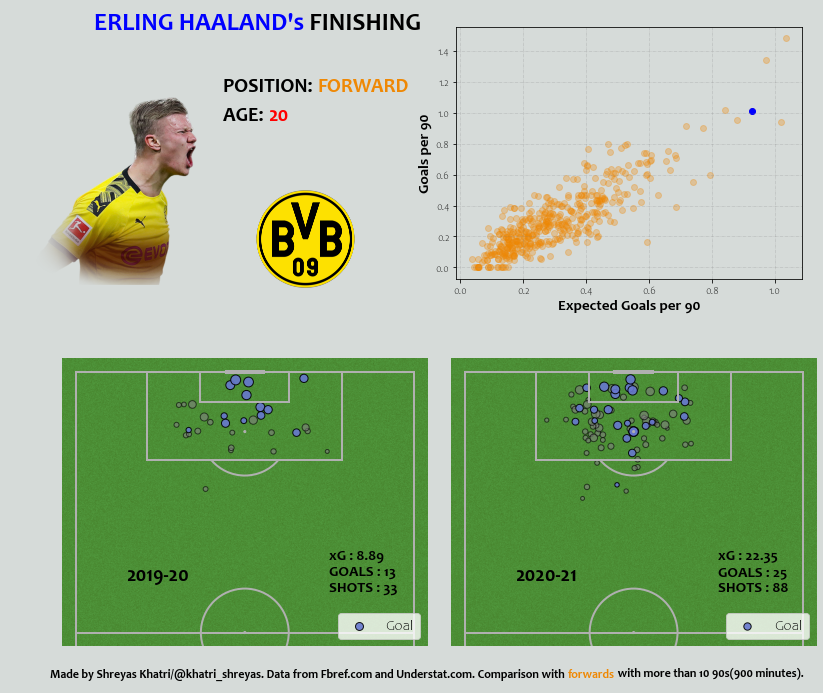

In [227]:
# SETTING UP THE AXES
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('off')
fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR THE FIRST SEASON
pitch = mplsoccer.VerticalPitch(half=True,pitch_type='opta',line_zorder=3,pitch_color='grass')
ax_opta1 = fig.add_axes((0.05, 0.06, 0.45, 0.4))
ax_opta1.patch.set_facecolor(background)
pitch.draw(ax=ax_opta1)

#PLOTTING OTHER SHOTS
df_fil = df_understat.loc[df_understat['Season']==2019]

pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*100, marker='o', alpha=0.6,
              edgecolor='black', facecolor='grey', ax=ax_opta1)

#NOW PLOTTING THE GOALS IN THE 2019-20 SEASON
pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*100, marker='o', alpha=0.9,
              edgecolor='black', facecolor='#6778d0', ax=ax_opta1, label='Goal')

# ADDING THE LEGEND
ax_opta1.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta1.text(25,61,'GOALS : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=15)
ax_opta1.text(25,64,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax_opta1.text(25,58,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax_opta1.text(85, 60, '2019-20', weight='bold', size=20)

# DOING THE SAME FOR THE 20-21 SEASON TOO
ax_opta2 = fig.add_axes((0.50, 0.06, 0.45, 0.4))
ax_opta2.patch.set_facecolor(background)
pitch.draw(ax=ax_opta2)

#PLOTTING OTHER SHOTS
df_fil = df_understat.loc[df_understat['Season']==2020]

pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*100, marker='o', alpha=0.6,
              edgecolor='black', facecolor='grey', ax=ax_opta2)

#NOW PLOTTING THE GOALS IN THE 2019-20 SEASON
pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*100, marker='o', alpha=0.9,
              edgecolor='black', facecolor='#6778d0', ax=ax_opta2, label='Goal')

# ADDING THE LEGEND
ax_opta2.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta2.text(25,61,'GOALS : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=15)
ax_opta2.text(25,64,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax_opta2.text(25,58,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax_opta2.text(85, 60, '2020-21', weight='bold', size=20)

# NOW PLOTTING THE SCATTERPLOT
ax_scatter = fig.add_axes([0.52,0.57,0.4,0.35])
ax_scatter.patch.set_facecolor(background)

# SETTING UP THE X AND Y OF THE SCATTERPLOT
no_90s = 10
df_fil = df_fbref[df_fbref['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW','MF,FW','FW,MF'])]

x,y = (df_fil['xG']/df_fil['90s']).to_list(), (df_fil['Gls']/df_fil['90s']).to_list()

ax_scatter.scatter(x,y,alpha=0.3,c='#EF8804')

# NOW FILTERING ERLING HAALAND'S DATA
df_player = df_fil[df_fil['Player']=='Erling Haaland']
ax_scatter.scatter(df_player['xG']/df_player['90s'], df_player['Gls']/df_player['90s'], c='blue')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.4)
ax_scatter.set_xlabel('Expected Goals per 90', fontdict = {'fontsize':15, 'weight' : 'bold', 'color':text_color})
ax_scatter.set_ylabel('Goals per 90', fontdict = dict(fontsize = 15, weight = 'bold',color=text_color))


#ADDING HAALAND'S IMAGE
ax_player = fig.add_axes([0,0.43,0.25,0.45])
ax_player.axis('off')
im = plt.imread('haaland.png')
ax_player.imshow(im)

# ADDING TITLES AND INFO
fig_text(0.1,0.94,"<ERLING HAALAND's> FINISHING",weight='heavy', size=25, highlight_textprops=[{'color':'blue'}])
fig_text(0.25,0.85,'POSITION: <FORWARD>',weight='bold', size=20, highlight_textprops=[{'color':'#EF8804'}])
fig_text(0.25,0.81,'AGE: <20>',weight='bold', size=20, highlight_textprops=[{'color':'red'}])

# ADDING CLUB LOGO
ax_team = fig.add_axes([0.27,0.55,0.15,0.15])
ax_team.axis('off')
im = plt.imread('bvb.png')
ax_team.imshow(im)

# ADDING A FOOTER
fig_text(0.05,0.03,'Made by Shreyas Khatri/@khatri_shreyas. Data from Fbref.com and Understat.com. Comparison with <forwards>'+
        ' with more than '+str(no_90s)+' 90s('+str(no_90s*90)+' minutes).',
        size=12, highlight_textprops=[{'color':'#EF8804'}], weight = 'bold')

#plt.savefig('Haaland_viz.png',dpi=300,facecolor=background)

CONGRATULATIONS, YOU HAVE SUCCESSFULLY MADE YOURSELF THIS AMAZING VIZUALISATION